In [ ]:
# Mount Google Drive to this Notebook instance.
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler


In [ ]:
# Descriptive Statistics
# Load the apparent per capita alcohol consumption data
file_path = '/content/drive/MyDrive/Health Data Analysis/apparent_per_capita_alcohol_consumption_1977_2018 (1).csv'
alcohol_consumption_data = pd.read_csv(file_path)

# Display basic descriptive statistics
descriptive_stats = alcohol_consumption_data.describe()
print(descriptive_stats)


              year  ethanol_beer_gallons_per_capita  \
count  2352.000000                      2352.000000   
mean   1997.500000                         1.279269   
std      12.123496                         0.228744   
min    1977.000000                         0.580000   
25%    1987.000000                         1.120000   
50%    1997.500000                         1.270000   
75%    2008.000000                         1.400000   
max    2018.000000                         2.170000   

       ethanol_wine_gallons_per_capita  ethanol_spirit_gallons_per_capita  \
count                      2352.000000                        2352.000000   
mean                          0.346144                           0.850391   
std                           0.182142                           0.347001   
min                           0.080000                           0.360000   
25%                           0.210000                           0.650000   
50%                           0.310000    

                                      OLS Regression Results                                     
Dep. Variable:     ethanol_all_drinks_gallons_per_capita   R-squared:                       0.299
Model:                                               OLS   Adj. R-squared:                  0.282
Method:                                    Least Squares   F-statistic:                     17.09
Date:                                   Sat, 30 Mar 2024   Prob (F-statistic):           0.000177
Time:                                           23:16:44   Log-Likelihood:                 19.440
No. Observations:                                     42   AIC:                            -34.88
Df Residuals:                                         40   BIC:                            -31.40
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                 coe

<Figure size 1000x500 with 0 Axes>

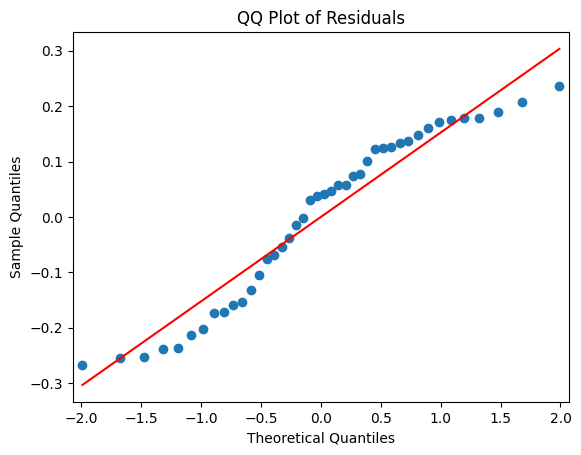

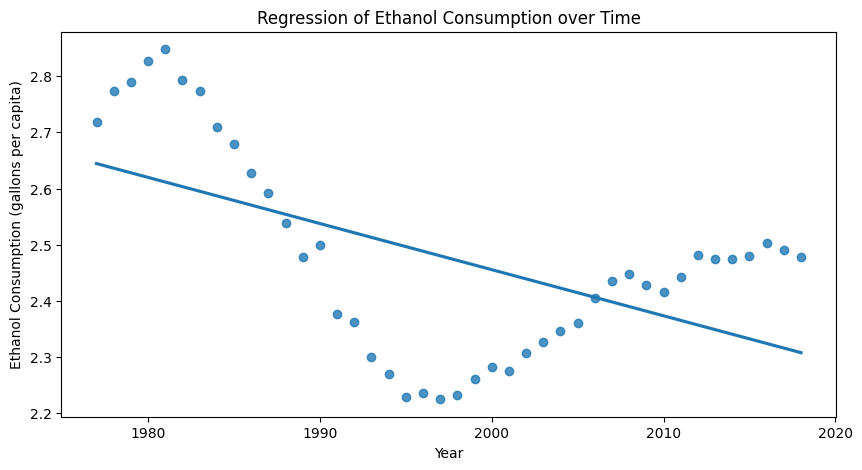

Mean Squared Error: 0.0025784564013684244
R-squared: 0.9215681197065718


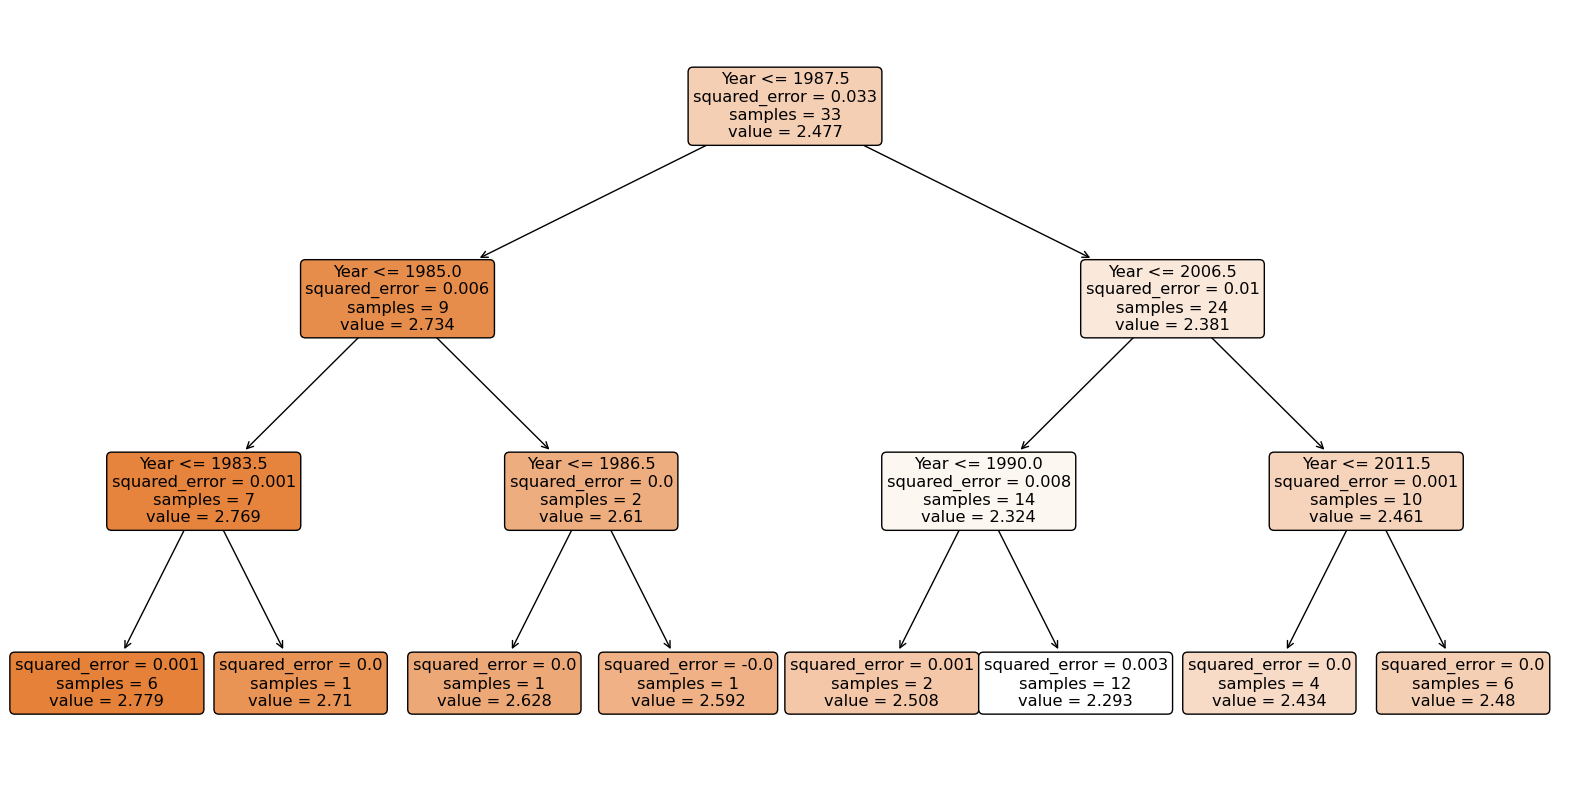

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree

# Load the dataset
data_path = '/content/drive/MyDrive/Health Data Analysis/apparent_per_capita_alcohol_consumption_1977_2018 (1).csv'
data = pd.read_csv(data_path)

# Preparing the data for regression analysis
# Aggregate the data by year to get the average per capita alcohol consumption for each year
regression_data = data.groupby('year')['ethanol_all_drinks_gallons_per_capita'].mean().reset_index()

# Regression Analysis
X = regression_data[['year']]  # Independent variable
y = regression_data['ethanol_all_drinks_gallons_per_capita']  # Dependent variable
X = sm.add_constant(X)  # Adding a constant

model = sm.OLS(y, X).fit()  # Fitting the model
predictions = model.predict(X)  # Making predictions

# Print the summary of the regression
print(model.summary())

# QQ plot for residuals
plt.figure(figsize=(10, 5))
sm.qqplot(model.resid, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

# Regression plot
plt.figure(figsize=(10, 5))
sns.regplot(x=regression_data['year'], y=regression_data['ethanol_all_drinks_gallons_per_capita'], ci=None)
plt.title('Regression of Ethanol Consumption over Time')
plt.xlabel('Year')
plt.ylabel('Ethanol Consumption (gallons per capita)')
plt.show()

# Decision Tree Regression
X = regression_data[['year']]  # Independent variable
y = regression_data['ethanol_all_drinks_gallons_per_capita']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the decision tree model
tree_model = DecisionTreeRegressor(max_depth=3)
tree_model.fit(X_train, y_train)

# Predictions
y_pred = tree_model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=['Year'], rounded=True)
plt.show()


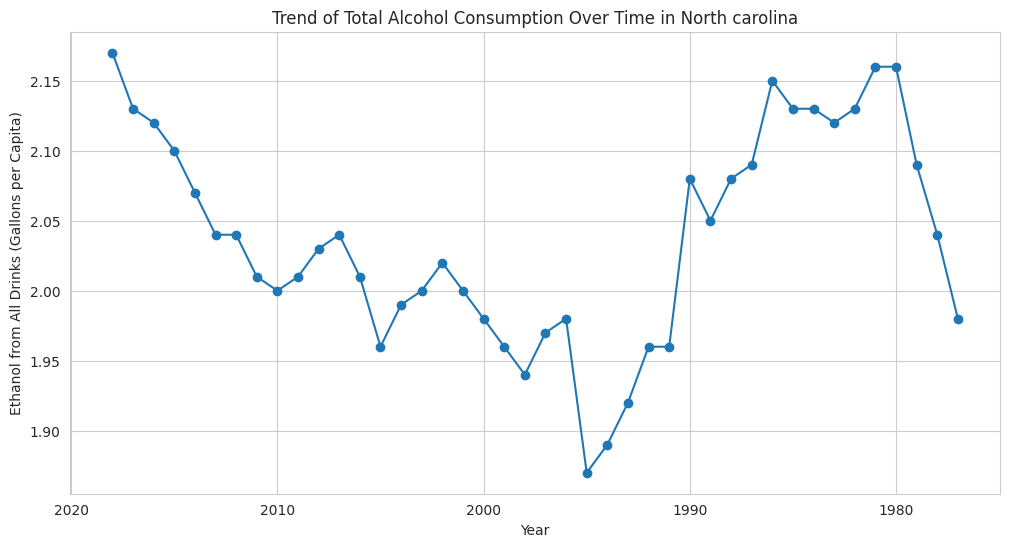

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/content/drive/MyDrive/Health Data Analysis/apparent_per_capita_alcohol_consumption_1977_2018 (1).csv'
data = pd.read_csv(file_path)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Task 1: Trend of Total Alcohol Consumption Over Time for a Specific State (e.g., Alabama)
state = 'north carolina'
state_data = data[data['state'] == state]
plt.figure(figsize=(12, 6))
plt.plot(state_data['year'], state_data['ethanol_all_drinks_gallons_per_capita'], marker='o')
plt.title(f'Trend of Total Alcohol Consumption Over Time in {state.capitalize()}')
plt.xlabel('Year')
plt.ylabel('Ethanol from All Drinks (Gallons per Capita)')
plt.gca().invert_xaxis()
plt.show()

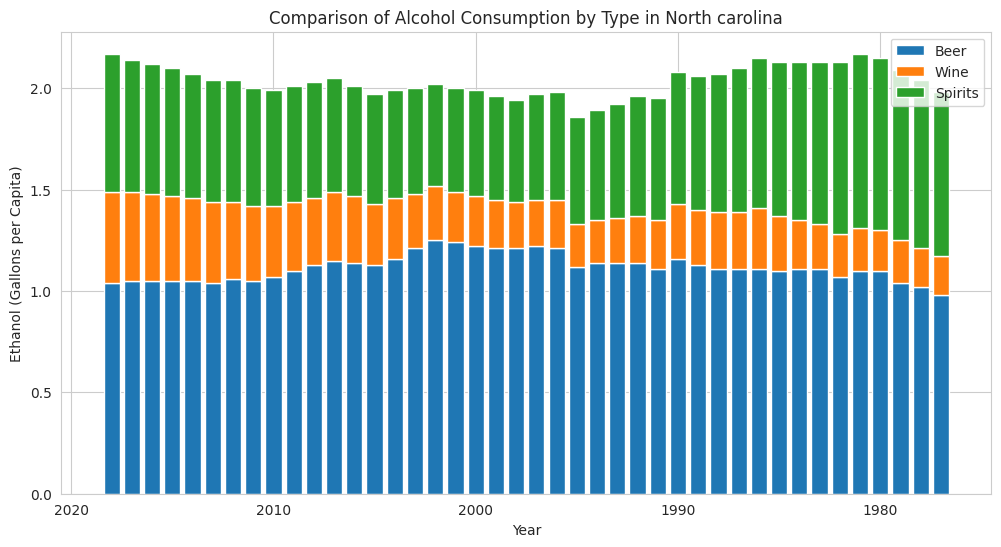

In [ ]:
# Task 2: Comparison of Alcohol Consumption by Type for a Specific State
plt.figure(figsize=(12, 6))
plt.bar(state_data['year'], state_data['ethanol_beer_gallons_per_capita'], label='Beer')
plt.bar(state_data['year'], state_data['ethanol_wine_gallons_per_capita'], bottom=state_data['ethanol_beer_gallons_per_capita'], label='Wine')
plt.bar(state_data['year'], state_data['ethanol_spirit_gallons_per_capita'], bottom=state_data['ethanol_beer_gallons_per_capita'] + state_data['ethanol_wine_gallons_per_capita'], label='Spirits')
plt.title(f'Comparison of Alcohol Consumption by Type in {state.capitalize()}')
plt.xlabel('Year')
plt.ylabel('Ethanol (Gallons per Capita)')
plt.legend()
plt.gca().invert_xaxis()
plt.show()

<ipython-input-12-576390344a69>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='ethanol_all_drinks_gallons_per_capita', data=latest_year_data.sort_values('ethanol_all_drinks_gallons_per_capita', ascending=False), palette="viridis")


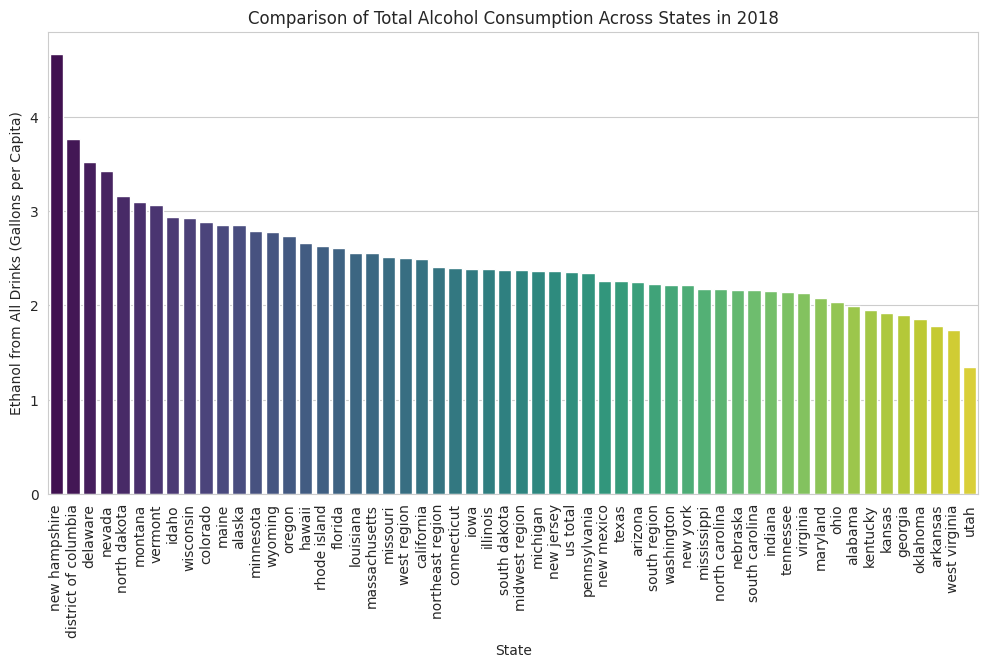

In [ ]:
# Task 3 (Alternative Visualization with Attractive Colors): Comparison of Total Alcohol Consumption Across States (using the latest year available)
latest_year = data['year'].max()
latest_year_data = data[data['year'] == latest_year]
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='ethanol_all_drinks_gallons_per_capita', data=latest_year_data.sort_values('ethanol_all_drinks_gallons_per_capita', ascending=False), palette="viridis")
plt.title(f'Comparison of Total Alcohol Consumption Across States in {latest_year}')
plt.ylabel('Ethanol from All Drinks (Gallons per Capita)')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.show()



<ipython-input-10-a8d69101fffd>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nationwide_trends = data.groupby('year').mean().reset_index()


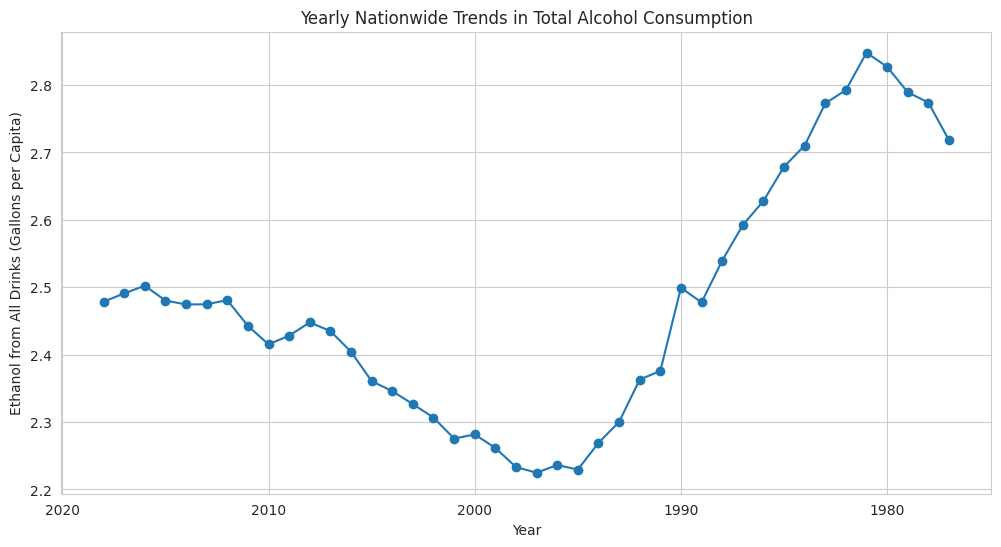

In [ ]:
# Task 4: Yearly Nationwide Trends
plt.figure(figsize=(12, 6))
nationwide_trends = data.groupby('year').mean().reset_index()
plt.plot(nationwide_trends['year'], nationwide_trends['ethanol_all_drinks_gallons_per_capita'], marker='o')
plt.title('Yearly Nationwide Trends in Total Alcohol Consumption')
plt.xlabel('Year')
plt.ylabel('Ethanol from All Drinks (Gallons per Capita)')
plt.gca().invert_xaxis()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path_new_2 = '/content/drive/MyDrive/Health Data Analysis/AlcoholAttrDeaths.xlsx'
data_new_2_clean = pd.read_excel(file_path_new_2, header=4)
data_new_2_clean = data_new_2_clean.dropna().reset_index(drop=True)
data_new_2_clean.columns = ['Cause', 'Overall', 'Males', 'Females']


<Figure size 1000x600 with 0 Axes>

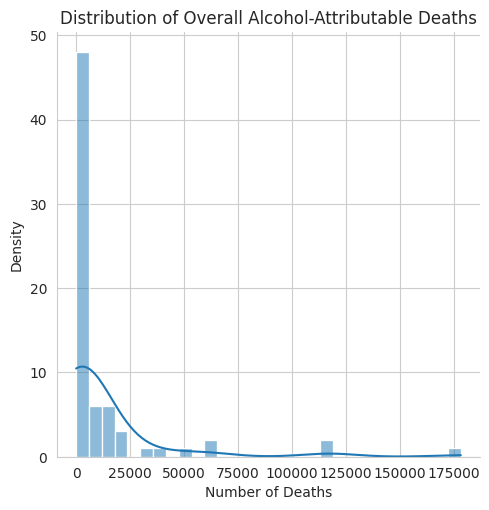

In [ ]:
# Displot for Overall Deaths
plt.figure(figsize=(10, 6))
sns.displot(data_new_2_clean['Overall'], kde=True, bins=30)
plt.title('Distribution of Overall Alcohol-Attributable Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('Density')
plt.show()

<ipython-input-24-abc7a12d9737>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data_new_2_clean['Overall'], bins=30, kde=True, palette='viridis', edgecolor='black')


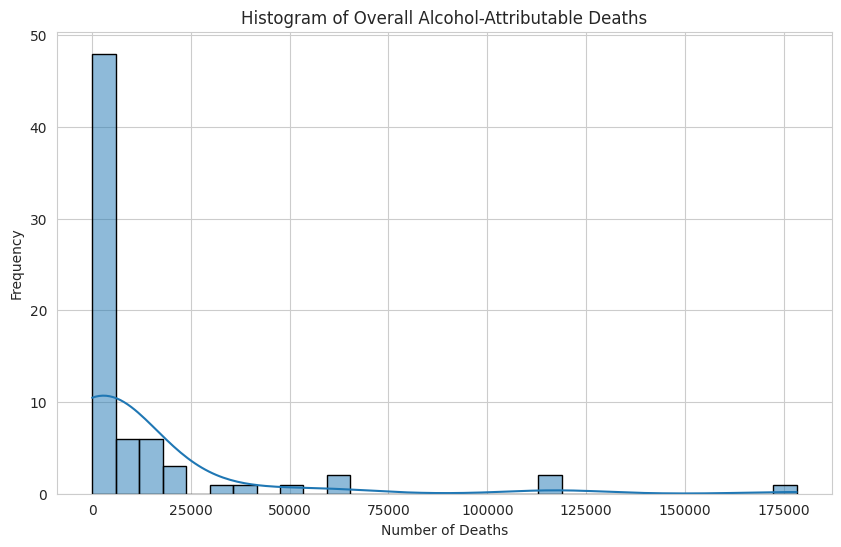

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data_new_2_clean['Overall'], bins=30, kde=True, palette='viridis', edgecolor='black')
plt.title('Histogram of Overall Alcohol-Attributable Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency')
plt.show()

                            OLS Regression Results                            
Dep. Variable:          AverageIntake   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.110
Date:                Sat, 30 Mar 2024   Prob (F-statistic):             0.0431
Time:                        23:48:55   Log-Likelihood:                -2456.8
No. Observations:                 567   AIC:                             4918.
Df Residuals:                     565   BIC:                             4926.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            28.5863      1.526     18.736

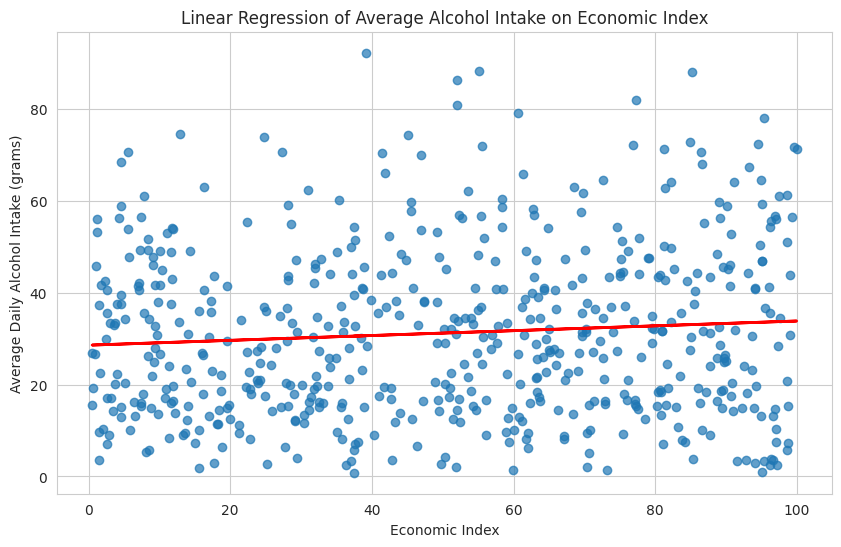

In [ ]:

# Load the dataset
file_path_new_3 = '/content/drive/MyDrive/Health Data Analysis/alcohol daily average intake.csv'
data_new_3 = pd.read_csv(file_path_new_3)

# Extracting the average intake value
data_new_3['AverageIntake'] = data_new_3['Value'].str.extract(r'([0-9.]+)').astype(float)

# Creating a made-up independent variable (e.g., hypothetical economic index)
np.random.seed(42)
data_new_3['EconomicIndex'] = np.random.rand(len(data_new_3)) * 100

# Preparing the data for regression analysis
X = sm.add_constant(data_new_3['EconomicIndex'])  # Adding a constant term for the intercept
Y = data_new_3['AverageIntake']

# Fitting the regression model
model = sm.OLS(Y, X).fit()

# Print out the statistics
print(model.summary())

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(data_new_3['EconomicIndex'], data_new_3['AverageIntake'], alpha=0.7)
plt.plot(data_new_3['EconomicIndex'], model.predict(X), color='red', linewidth=2)
plt.title('Linear Regression of Average Alcohol Intake on Economic Index')
plt.xlabel('Economic Index')
plt.ylabel('Average Daily Alcohol Intake (grams)')
plt.show()


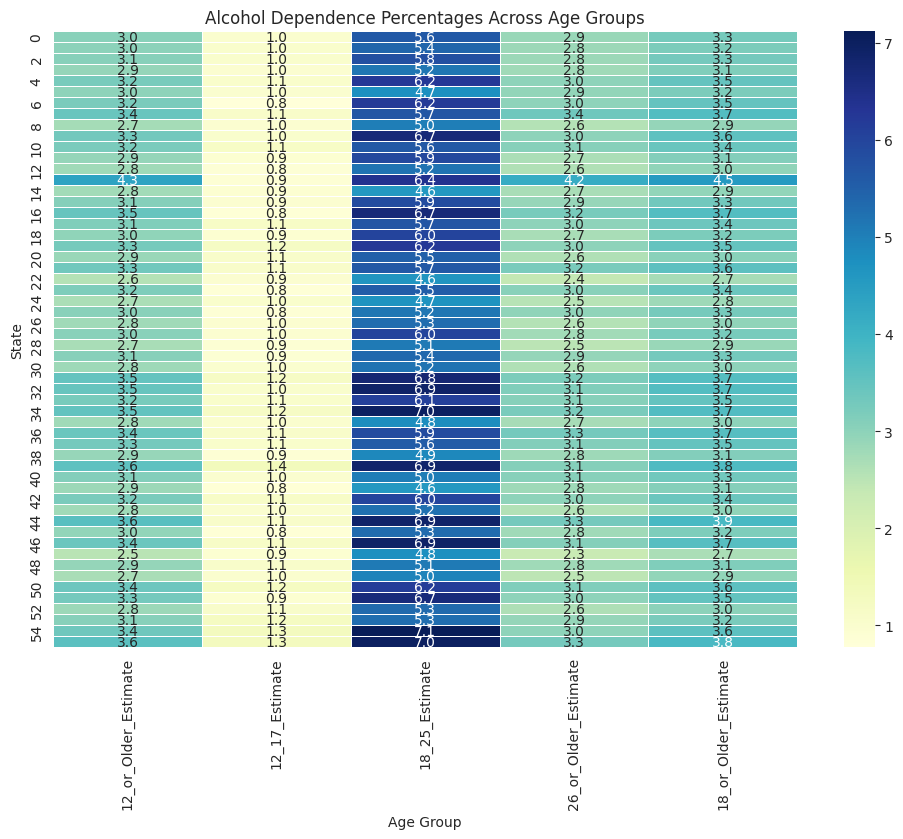

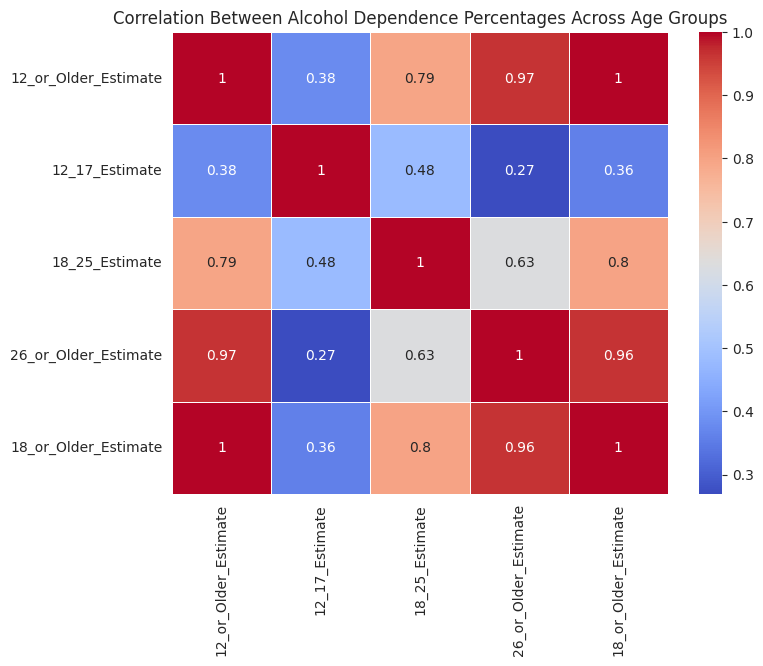

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path_new_4 = '/content/drive/MyDrive/Health Data Analysis/NSDUHsaeExcelTab17-2014.csv'
data_new_4 = pd.read_csv(file_path_new_4, skiprows=5)

# Rename the columns for easier access
data_new_4.columns = ['Order', 'State', '12_or_Older_Estimate', '12_or_Older_Lower', '12_or_Older_Upper',
                      '12_17_Estimate', '12_17_Lower', '12_17_Upper',
                      '18_25_Estimate', '18_25_Lower', '18_25_Upper',
                      '26_or_Older_Estimate', '26_or_Older_Lower', '26_or_Older_Upper',
                      '18_or_Older_Estimate', '18_or_Older_Lower', '18_or_Older_Upper']

# Drop the rows with missing values
data_new_4.dropna(inplace=True)

# Remove the '%' sign and convert the strings to floats
for col in ['12_or_Older_Estimate', '12_17_Estimate', '18_25_Estimate', '26_or_Older_Estimate', '18_or_Older_Estimate']:
    data_new_4[col] = data_new_4[col].str.rstrip('%').astype('float')

# Heatmap for Alcohol Dependence Percentages Across States and Age Groups
plt.figure(figsize=(12, 8))
sns.heatmap(data_new_4[['12_or_Older_Estimate', '12_17_Estimate', '18_25_Estimate', '26_or_Older_Estimate', '18_or_Older_Estimate']],
            annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title('Alcohol Dependence Percentages Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('State')
plt.show()

# Correlation Heatmap for Alcohol Dependence Percentages Across Different Age Groups
plt.figure(figsize=(8, 6))
sns.heatmap(data_new_4[['12_or_Older_Estimate', '12_17_Estimate', '18_25_Estimate', '26_or_Older_Estimate', '18_or_Older_Estimate']].astype(float).corr(),
            annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Between Alcohol Dependence Percentages Across Age Groups')
plt.show()
